In [1]:
# Importanto CSV de frequencias gerado pelo outro notebook

import pandas as pd

porcentagem_transacoes_por_empresa = pd.read_csv("porcentagem_transacoes_por_empresa.csv")

print(porcentagem_transacoes_por_empresa.shape)
print(porcentagem_transacoes_por_empresa.head(2))

(1548, 27)
                        empresa        0h        1h        2h        3h  \
0  21404ebaa0106ca20ae283c89271  0.017120  0.003064  0.003965  0.002883   
1  510766392a95afd41c6bd526381a  0.006091  0.005461  0.001680  0.001680   

         4h       5h        6h        7h        8h  \
0  0.003424  0.00856  0.021806  0.022707  0.019733   
1  0.001890  0.00147  0.029616  0.049779  0.054400   

                         ...                               16h       17h  \
0                        ...                          0.054604  0.072536   
1                        ...                          0.056291  0.059861   

        18h       19h       20h       21h       22h       23h  Total  \
0  0.091728  0.084340  0.070643  0.045684  0.041809  0.051721  11098   
1  0.067213  0.060491  0.063222  0.059021  0.039277  0.026045   4761   

                                             dominio  
0  6139646137356433363237396637323937336161383832...  
1  61396461373564333632373966373239373361613

In [2]:
# Retirando empresas que tiveram < 100 transações

for index, row in porcentagem_transacoes_por_empresa.iterrows():
    if row["Total"] < 100:
        porcentagem_transacoes_por_empresa = porcentagem_transacoes_por_empresa.drop(index)
        
print(porcentagem_transacoes_por_empresa.shape)
print(porcentagem_transacoes_por_empresa.head(2))

(1389, 27)
                        empresa        0h        1h        2h        3h  \
0  21404ebaa0106ca20ae283c89271  0.017120  0.003064  0.003965  0.002883   
1  510766392a95afd41c6bd526381a  0.006091  0.005461  0.001680  0.001680   

         4h       5h        6h        7h        8h  \
0  0.003424  0.00856  0.021806  0.022707  0.019733   
1  0.001890  0.00147  0.029616  0.049779  0.054400   

                         ...                               16h       17h  \
0                        ...                          0.054604  0.072536   
1                        ...                          0.056291  0.059861   

        18h       19h       20h       21h       22h       23h  Total  \
0  0.091728  0.084340  0.070643  0.045684  0.041809  0.051721  11098   
1  0.067213  0.060491  0.063222  0.059021  0.039277  0.026045   4761   

                                             dominio  
0  6139646137356433363237396637323937336161383832...  
1  61396461373564333632373966373239373361613

In [3]:
# função para separar dataframe em test e training

import random

COLUNAS =  [
    'empresa',
    '0h',
    '1h',
    '2h',
    '3h',
    '4h',
    '5h',
    '6h',
    '7h',
    '8h',
    '9h',
    '10h',
    '11h',
    '12h',
    '13h',
    '14h',
    '15h',
    '16h',
    '17h',
    '18h',
    '19h',
    '20h',
    '21h',
    '22h',
    '23h',
    'Total',
    'dominio',
    'Classe KMeans'
]

trainingSet=pd.DataFrame(columns=COLUNAS)
testSet=pd.DataFrame(columns=COLUNAS)

def loadDataframes(dataframe, split, trainingSet , testSet):
    trainingIndex = 0
    testIndex = 0
    for index, row in dataframe.iterrows():
        #for y in range(23):
        #    row[str(y) + "h"] = float(row[str(y) + "h"])
        if random.random() < split:
            trainingSet.loc[trainingIndex] = dataframe.loc[index]
            trainingIndex += 1
        else:
            testSet.loc[testIndex] = dataframe.loc[index]
            testIndex += 1

In [13]:
from sklearn.cluster import KMeans

X = porcentagem_transacoes_por_empresa.iloc[:,1:25]

kmeans = KMeans(n_clusters=5, random_state=0).fit(X)
porcentagem_transacoes_por_empresa['Classe KMeans'] = kmeans.fit_predict(X)

print(porcentagem_transacoes_por_empresa.head(3))


                        empresa        0h        1h        2h        3h  \
0  21404ebaa0106ca20ae283c89271  0.017120  0.003064  0.003965  0.002883   
1  510766392a95afd41c6bd526381a  0.006091  0.005461  0.001680  0.001680   
2  8ef4d40b852168ea8e3bbc4c89a0  0.030858  0.028940  0.018828  0.013075   

         4h        5h        6h        7h        8h      ...             17h  \
0  0.003424  0.008560  0.021806  0.022707  0.019733      ...        0.072536   
1  0.001890  0.001470  0.029616  0.049779  0.054400      ...        0.059861   
2  0.018480  0.022141  0.032427  0.045676  0.045502      ...        0.055091   

        18h       19h       20h       21h       22h       23h  Total  \
0  0.091728  0.084340  0.070643  0.045684  0.041809  0.051721  11098   
1  0.067213  0.060491  0.063222  0.059021  0.039277  0.026045   4761   
2  0.055439  0.059798  0.054916  0.045328  0.046374  0.031555   5736   

                                             dominio  Classe KMeans  
0  6139646137356433

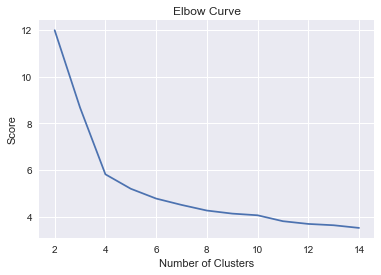

In [12]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

Nc = range(2, 15)

kmeans = [KMeans(n_clusters=i) for i in Nc]

kmeans

score = [kmeans[i].fit(X).inertia_ for i in range(len(kmeans))]

score

plt.plot(Nc,score)

plt.xlabel('Number of Clusters')

plt.ylabel('Score')

plt.title('Elbow Curve')

plt.show()

In [14]:
# Exportando arquivo Classes Kmeans

export_csv = porcentagem_transacoes_por_empresa.to_csv (r'frequencia_empresas_clusterizada.csv', index_label = "index")



In [15]:
# Aplicando a função para separação de test e training

loadDataframes(porcentagem_transacoes_por_empresa,0.67,trainingSet,testSet)


In [16]:
print(trainingSet.shape)
print(trainingSet.head(2))
print(testSet.shape)
print(testSet.head(2))

(944, 28)
                        empresa        0h        1h        2h        3h  \
0  21404ebaa0106ca20ae283c89271  0.017120  0.003064  0.003965  0.002883   
1  510766392a95afd41c6bd526381a  0.006091  0.005461  0.001680  0.001680   

         4h       5h        6h        7h        8h      ...             17h  \
0  0.003424  0.00856  0.021806  0.022707  0.019733      ...        0.072536   
1  0.001890  0.00147  0.029616  0.049779  0.054400      ...        0.059861   

        18h       19h       20h       21h       22h       23h  Total  \
0  0.091728  0.084340  0.070643  0.045684  0.041809  0.051721  11098   
1  0.067213  0.060491  0.063222  0.059021  0.039277  0.026045   4761   

                                             dominio  Classe KMeans  
0  6139646137356433363237396637323937336161383832...              0  
1  6139646137356433363237396637323937336161383832...              0  

[2 rows x 28 columns]
(445, 28)
                        empresa        0h        1h        2h     

In [17]:
# Calculo de distancias

import math

def euclideanDistance(instance1, instance2):
    distance = 0
    distance += pow((instance1["0h"] - instance2["0h"]), 2)
    distance += pow((instance1["1h"] - instance2["1h"]), 2)
    distance += pow((instance1["2h"] - instance2["2h"]), 2)
    distance += pow((instance1["3h"] - instance2["3h"]), 2)
    distance += pow((instance1["4h"] - instance2["4h"]), 2)
    distance += pow((instance1["5h"] - instance2["5h"]), 2)
    distance += pow((instance1["6h"] - instance2["6h"]), 2)
    distance += pow((instance1["7h"] - instance2["7h"]), 2)
    distance += pow((instance1["8h"] - instance2["8h"]), 2)
    distance += pow((instance1["9h"] - instance2["9h"]), 2)
    distance += pow((instance1["10h"] - instance2["10h"]), 2)
    distance += pow((instance1["11h"] - instance2["11h"]), 2)
    distance += pow((instance1["12h"] - instance2["12h"]), 2)
    distance += pow((instance1["13h"] - instance2["13h"]), 2)
    distance += pow((instance1["14h"] - instance2["14h"]), 2)
    distance += pow((instance1["15h"] - instance2["15h"]), 2)
    distance += pow((instance1["16h"] - instance2["16h"]), 2)
    distance += pow((instance1["17h"] - instance2["17h"]), 2)
    distance += pow((instance1["18h"] - instance2["18h"]), 2)
    distance += pow((instance1["19h"] - instance2["19h"]), 2)
    distance += pow((instance1["20h"] - instance2["20h"]), 2)
    distance += pow((instance1["21h"] - instance2["21h"]), 2)
    distance += pow((instance1["22h"] - instance2["22h"]), 2)
    distance += pow((instance1["23h"] - instance2["23h"]), 2)
    return math.sqrt(distance)


In [18]:
# Testando, se resposta for 0.073309 está ok (feito no excel)

print(euclideanDistance(porcentagem_transacoes_por_empresa.loc[0],porcentagem_transacoes_por_empresa.loc[1]))

0.07330887175451016


In [19]:
# Calculando os "vizinhos"

import operator 
def getNeighbors(trainingSet, testInstance, k):
    distances = []
    for x in range(len(trainingSet.index)):
        dist = euclideanDistance(testInstance, trainingSet.loc[x])
        distances.append((trainingSet.loc[x], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

In [20]:
# Testando vizinhos

neighbors = getNeighbors(trainingSet, testSet.loc[0], 2)
print(neighbors)

[empresa                               68f2d109d3ce3acfb0c9f0acf940
0h                                                               0
1h                                                               0
2h                                                               0
3h                                                               0
4h                                                               0
5h                                                      0.00169492
6h                                                       0.0169492
7h                                                       0.0508475
8h                                                       0.0618644
9h                                                       0.0627119
10h                                                      0.0584746
11h                                                      0.0550847
12h                                                      0.0661017
13h                                                      0.06

In [21]:
# Predizendo a resposta 

import operator

def getResponse(neighbors):
    classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x]["Classe KMeans"]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes, reverse=True)
    return sortedVotes[0]

In [22]:
# Pegando a acurácia do modelo

def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet.index)):
        if testSet.loc[x]["Classe KMeans"] is predictions[x]:
            correct += 1
    return (correct/float(len(testSet.index))) * 100.0


In [23]:
# Testando o Modelo
predictions=[]

k = 5
    
for x in range(len(testSet.index)):
    neighbors = getNeighbors(trainingSet, testSet.loc[x], k)
    result = getResponse(neighbors)
    predictions.append(result)
    print('> predicted=' + repr(result) + ', actual=' + repr(testSet.loc[x]["Classe KMeans"]))

accuracy = getAccuracy(testSet, predictions)
print('Accuracy: ' + repr(accuracy) + '%')

> predicted=0, actual=0
> predicted=0, actual=0
> predicted=0, actual=0
> predicted=4, actual=4
> predicted=0, actual=0
> predicted=0, actual=0
> predicted=0, actual=0
> predicted=4, actual=4
> predicted=4, actual=4
> predicted=0, actual=0
> predicted=4, actual=4
> predicted=4, actual=4
> predicted=0, actual=0
> predicted=0, actual=0
> predicted=4, actual=4
> predicted=4, actual=0
> predicted=0, actual=0
> predicted=0, actual=0
> predicted=0, actual=0
> predicted=0, actual=0
> predicted=0, actual=0
> predicted=0, actual=0
> predicted=0, actual=0
> predicted=0, actual=0
> predicted=4, actual=4
> predicted=0, actual=0
> predicted=0, actual=0
> predicted=4, actual=4
> predicted=4, actual=4
> predicted=4, actual=4
> predicted=0, actual=0
> predicted=4, actual=4
> predicted=0, actual=0
> predicted=0, actual=0
> predicted=4, actual=4
> predicted=0, actual=0
> predicted=0, actual=0
> predicted=4, actual=4
> predicted=4, actual=0
> predicted=4, actual=4
> predicted=0, actual=0
> predicted=0, a

> predicted=2, actual=2
> predicted=2, actual=2
> predicted=2, actual=2
> predicted=2, actual=2
> predicted=3, actual=3
> predicted=2, actual=2
> predicted=2, actual=2
> predicted=3, actual=3
> predicted=3, actual=3
> predicted=2, actual=2
> predicted=2, actual=2
> predicted=2, actual=2
> predicted=3, actual=3
> predicted=2, actual=2
> predicted=2, actual=2
> predicted=2, actual=2
> predicted=2, actual=2
> predicted=2, actual=2
> predicted=3, actual=3
> predicted=2, actual=2
> predicted=3, actual=3
> predicted=3, actual=3
> predicted=2, actual=2
> predicted=3, actual=3
> predicted=2, actual=2
> predicted=2, actual=2
> predicted=2, actual=2
> predicted=3, actual=3
> predicted=3, actual=3
> predicted=3, actual=3
> predicted=2, actual=2
> predicted=2, actual=2
> predicted=2, actual=2
> predicted=3, actual=3
> predicted=3, actual=2
> predicted=3, actual=2
> predicted=3, actual=3
> predicted=2, actual=2
> predicted=2, actual=2
> predicted=2, actual=2
> predicted=4, actual=4
> predicted=2, a